# Tarefa de Grupo - Preço da eletricidade

#### Dados e Aprendizagem Automática 

link: https://www.kaggle.com/datasets/salilchoubey/electrity-prices

Problema de regressão

___
Context :
    Dataset containing the price of electricity for a data center in addition to factors that might affect the price.
___
Column Description:

    DateTime: String, defines date and time of sample
    Holiday: String, gives name of holiday if day is a bank holiday
    HolidayFlag: integer, 1 if day is a bank holiday, zero otherwise
    DayOfWeek: integer (0-6), 0 monday, day of week
    WeekOfYear: integer, running week within year of this date
    Day integer: day of the date
    Month integer: month of the date
    Year integer: year of the date
    PeriodOfDay integer: denotes half hour period of day (0-47)
    ForecastWindProduction: the forecasted wind production for this period
    SystemLoadEA: the national load forecast for this period
    SMPEA: the price forecast for this period
    ORKTemperature: the actual temperature measured at Cork airport
    ORKWindspeed: the actual windspeed measured at Cork airport
    CO2Intensity: the actual CO2 intensity in (g/kWh) for the electricity produced
    ActualWindProduction: the actual wind energy production for this period
    SystemLoadEP2: the actual national system load for this period
    SMPEP2: the actual price of this time period, the value to be forecasted
___

Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Ingestão de dados

In [3]:
df = pd.read_csv("./electricity_prices.csv")

/tmp/ipykernel_25867/1259099235.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./electricity_prices.csv")


Exploração de dados

In [21]:
df.head()
#df.tail()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [24]:
print(df.shape)
print()
print(df.columns)
print()
print(df.info())


(38014, 18)

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64

In [22]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [25]:
sns.pairplot(df)

/home/simao/miniconda3/envs/daa310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x7fc741299510> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.histplot 


<Axes: >

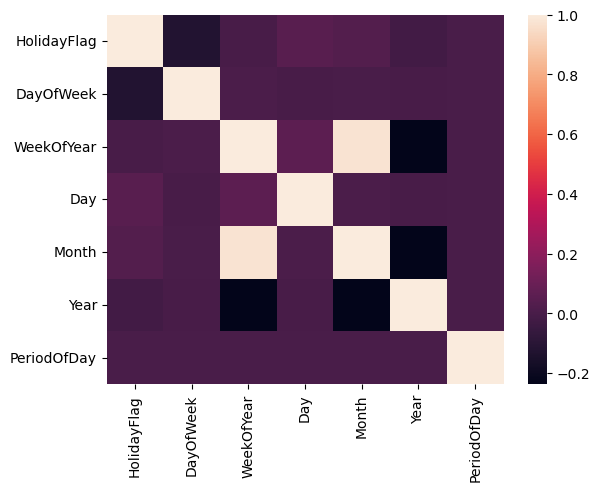

In [26]:
sns.heatmap(df.corr(numeric_only=True))

Tratamento de dados

Geração de modelos

Análise do Modelo

#### Análises retiradas